In [1]:
import pandas as pd

# Carregar o arquivo CSV
url = "https://raw.githubusercontent.com/icarocarmona/Tech-Challenges-DTAT-Grupo-26/main/F4-DATA-VIZ-PRODUCTION-MODELS/petroleo_bruto.csv"
df = pd.read_csv(url)

# Verificar as primeiras linhas do dataframe
print(df.head())

# Verificar informações sobre o dataframe
print(df.info())

# Estatísticas descritivas básicas
print(df.describe())

# Verificar se há valores nulos
print(df.isnull().sum())




         Data  Preco
0  1987-05-20  18.63
1  1987-05-21  18.45
2  1987-05-22  18.55
3  1987-05-25  18.60
4  1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    11164 non-null  object 
 1   Preco   11164 non-null  float64
dtypes: float64(1), object(1)
memory usage: 174.6+ KB
None
              Preco
count  11164.000000
mean      53.009718
std       33.229403
min        9.100000
25%       20.480000
50%       48.210000
75%       76.302500
max      143.950000
Data     0
Preco    0
dtype: int64


In [2]:
# Renomear a coluna
df = df.rename(columns={'Preço - petróleo bruto - Brent (FOB)': 'Preço'})

print(df.head())


         Data  Preco
0  1987-05-20  18.63
1  1987-05-21  18.45
2  1987-05-22  18.55
3  1987-05-25  18.60
4  1987-05-26  18.63


Exemplos de eventos que podem ter impactado o preço do petróleo:

**Crises geopolíticas:** Guerras, conflitos, sanções comerciais em regiões produtoras de petróleo podem afetar a oferta e demanda global.

**Instabilidade política em países produtores:** Mudanças de governo, instabilidade política ou problemas de segurança podem afetar a produção e exportação de petróleo.

**Economia global:** Crises econômicas, recessões ou períodos de crescimento econômico robusto podem influenciar a demanda por petróleo.

**Decisões da OPEP:** Acordos de produção da OPEP (Organização dos Países Exportadores de Petróleo) podem ter um grande impacto no mercado global de petróleo.

In [3]:
# Converter a coluna de datas para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

In [5]:
df.mean()

Data     2006-08-04 07:03:12.189179392
Preco                        53.009718
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    11164 non-null  datetime64[ns]
 1   Preco   11164 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 174.6 KB


In [11]:
df.head()

,Data,Preco
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<Axes: title={'center': 'Variações Anuais do Preço do Petróleo Brent'}, xlabel='Ano'>

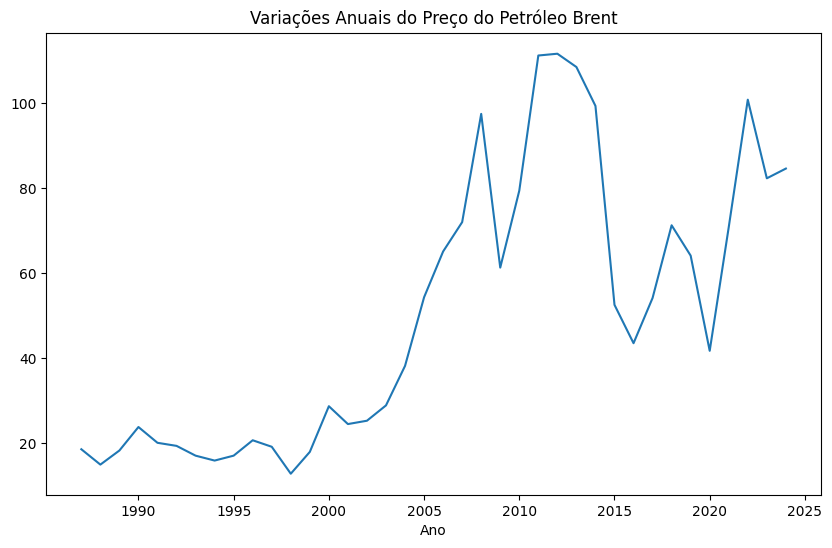

In [13]:
# Convertendo a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Extraindo o ano da coluna 'Data'
df['Ano'] = df['Data'].dt.year

# Agrupando os dados por ano e calculando a média dos preços
preco_anual = df.groupby('Ano')['Preco'].mean()

# Criando um gráfico de linha das variações anuais
preco_anual.plot(kind='line', figsize=(10, 6), title='Variações Anuais do Preço do Petróleo Brent')


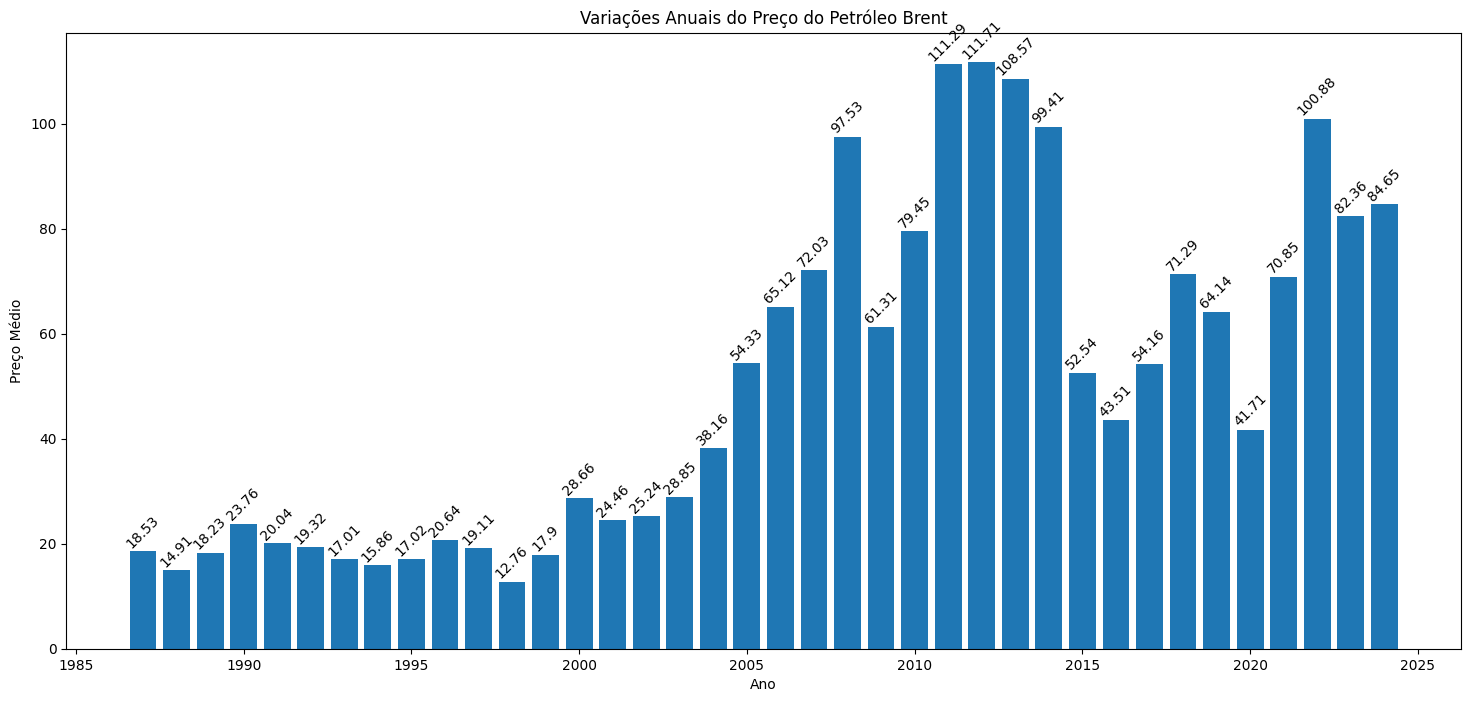

In [33]:
import matplotlib.pyplot as plt

# Criando o gráfico de barras
plt.figure(figsize=(18, 8))
bars = plt.bar(preco_anual.index, preco_anual.values)

# Adicionando os valores das barras inclinados
for bar, value in zip(bars, preco_anual.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2), ha='center', va='bottom', rotation=45)

plt.title('Variações Anuais do Preço do Petróleo Brent')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.show()

